In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

**Airlines Dataset**

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Airlines+Data.xlsx to Airlines+Data.xlsx


In [3]:
airlines=pd.read_excel('Airlines+Data.xlsx')
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [6]:
airlines.isnull().sum()

Month         0
Passengers    0
dtype: int64

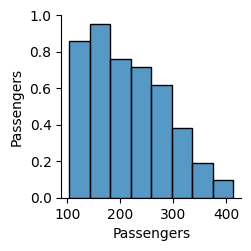

In [7]:
sns.pairplot(airlines)

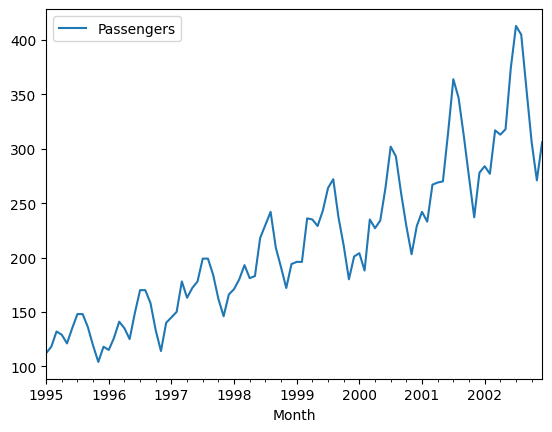

In [8]:
airlines1=pd.read_excel('Airlines+Data.xlsx', header=0, index_col=0,parse_dates=True)
airlines1.plot()
plt.show()

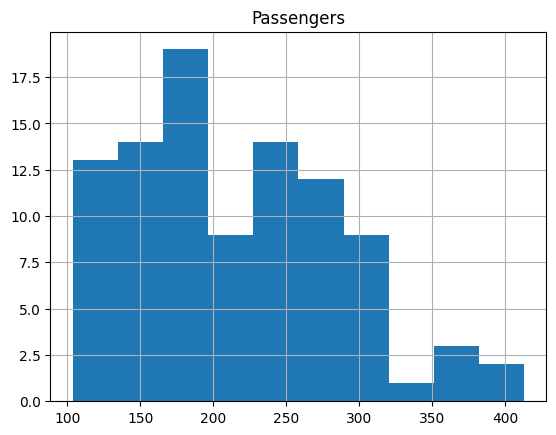

In [9]:
airlines1.hist()
plt.show()

<Axes: ylabel='Density'>

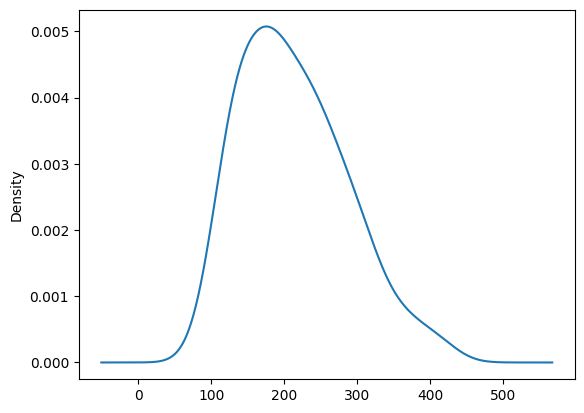

In [10]:
airlines.Passengers.plot(kind='kde')

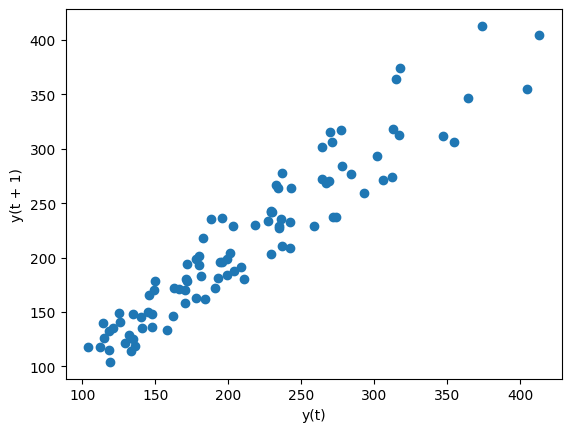

In [11]:
from pandas.plotting import lag_plot
lag_plot(airlines1)
plt.show()

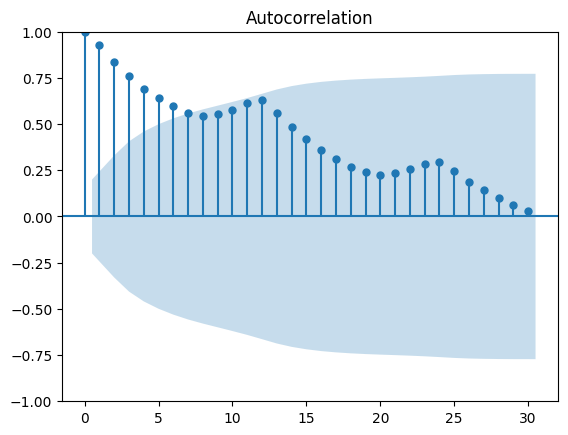

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(airlines1, lags=30)
plt.show()

In [13]:
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt

In [14]:
upsampled=airlines1.resample('D').mean()
print(upsampled.head(30))

            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-07         NaN
1995-01-08         NaN
1995-01-09         NaN
1995-01-10         NaN
1995-01-11         NaN
1995-01-12         NaN
1995-01-13         NaN
1995-01-14         NaN
1995-01-15         NaN
1995-01-16         NaN
1995-01-17         NaN
1995-01-18         NaN
1995-01-19         NaN
1995-01-20         NaN
1995-01-21         NaN
1995-01-22         NaN
1995-01-23         NaN
1995-01-24         NaN
1995-01-25         NaN
1995-01-26         NaN
1995-01-27         NaN
1995-01-28         NaN
1995-01-29         NaN
1995-01-30         NaN


            Passengers
Month                 
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194
1995-01-06  112.967742
1995-01-07  113.161290
1995-01-08  113.354839
1995-01-09  113.548387
1995-01-10  113.741935
1995-01-11  113.935484
1995-01-12  114.129032
1995-01-13  114.322581
1995-01-14  114.516129
1995-01-15  114.709677
1995-01-16  114.903226
1995-01-17  115.096774
1995-01-18  115.290323
1995-01-19  115.483871
1995-01-20  115.677419
1995-01-21  115.870968
1995-01-22  116.064516
1995-01-23  116.258065
1995-01-24  116.451613
1995-01-25  116.645161
1995-01-26  116.838710
1995-01-27  117.032258
1995-01-28  117.225806
1995-01-29  117.419355
1995-01-30  117.612903


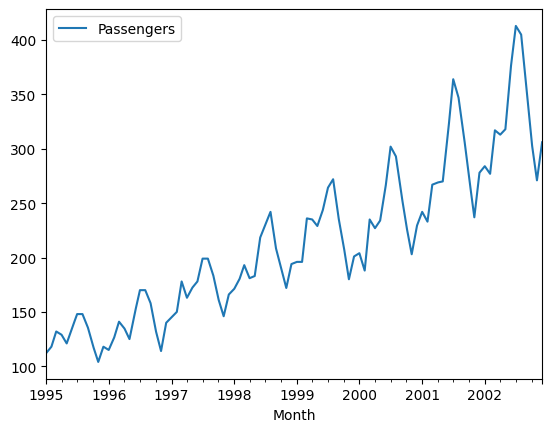

In [15]:
interpolated=upsampled.interpolate(method='linear')
print(interpolated.head(30))
interpolated.plot()
plt.show()

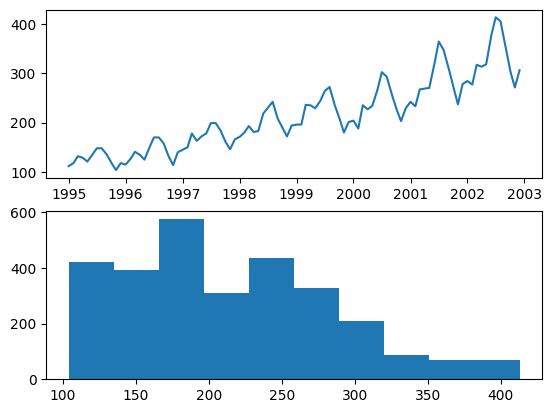

In [16]:
plt.subplot(211)
plt.plot(interpolated)
plt.subplot(212)
plt.hist(interpolated)
plt.show()

In [17]:
interpolated

,Passengers
Month,
1995-01-01,112.000000
1995-01-02,112.193548
1995-01-03,112.387097
1995-01-04,112.580645
1995-01-05,112.774194
...,...
2002-11-27,301.333333
2002-11-28,302.500000
2002-11-29,303.666667


In [18]:
dataframe=DataFrame(interpolated)
dataframe.columns=['Passengers']
dataframe['Passengers']=sqrt(dataframe['Passengers'])

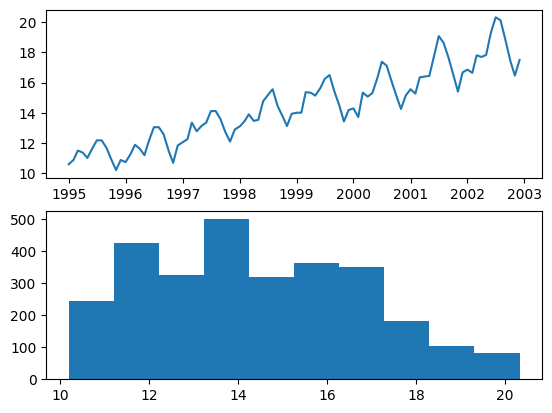

In [19]:
plt.subplot(211)
plt.plot(dataframe['Passengers'])
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

In [20]:
interpolated

,Passengers
Month,
1995-01-01,10.583005
1995-01-02,10.592146
1995-01-03,10.601278
1995-01-04,10.610403
1995-01-05,10.619519
...,...
2002-11-27,17.358955
2002-11-28,17.392527
2002-11-29,17.426034


In [21]:
from numpy import log
dataframe=DataFrame(interpolated)
dataframe.columns=['Passengers']
dataframe['Passengers']=log(dataframe['Passengers'])

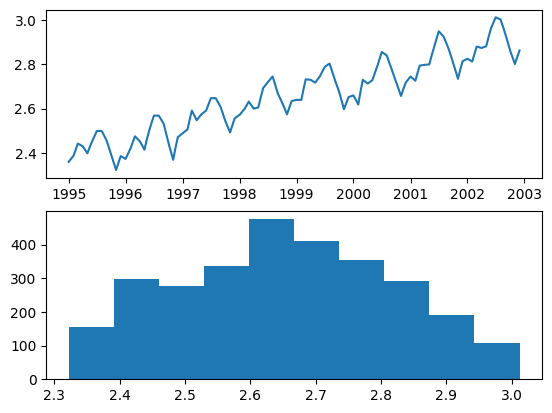

In [22]:
plt.subplot(211)
plt.plot(dataframe['Passengers'])
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

In [23]:
interpolated

,Passengers
Month,
1995-01-01,2.359249
1995-01-02,2.360113
1995-01-03,2.360975
1995-01-04,2.361835
1995-01-05,2.362694
...,...
2002-11-27,2.854109
2002-11-28,2.856041
2002-11-29,2.857965


In [24]:
interpolated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2892 entries, 1995-01-01 to 2002-12-01
Freq: D
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  2892 non-null   float64
dtypes: float64(1)
memory usage: 45.2 KB


In [25]:
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [26]:
airlines["Date"]=pd.to_datetime(airlines.Month,format="%b-%y")
airlines["Months"]=airlines.Date.dt.strftime("%b")
airlines["Year"]=airlines.Date.dt.strftime("%y")

<Axes: xlabel='Month', ylabel='Year'>

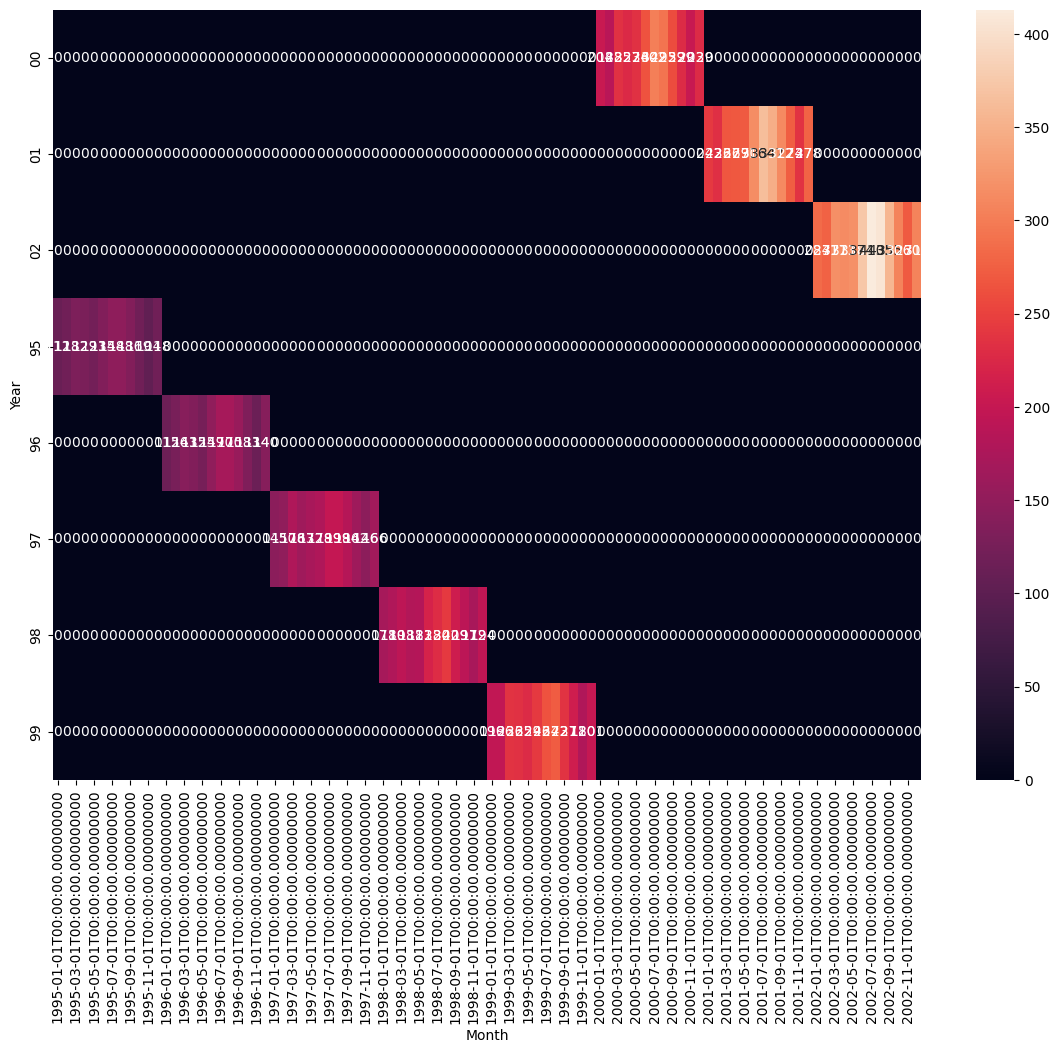

In [27]:
plt.figure(figsize=(14,10))
heatmap_y_month = pd.pivot_table(data=airlines,values="Passengers",index="Year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<Axes: xlabel='Months', ylabel='Passengers'>

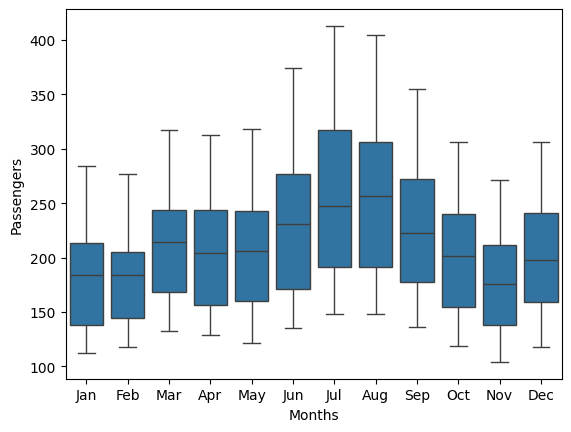

In [28]:
sns.boxplot(x="Months", y="Passengers", data=airlines)

<Axes: xlabel='Year', ylabel='Passengers'>

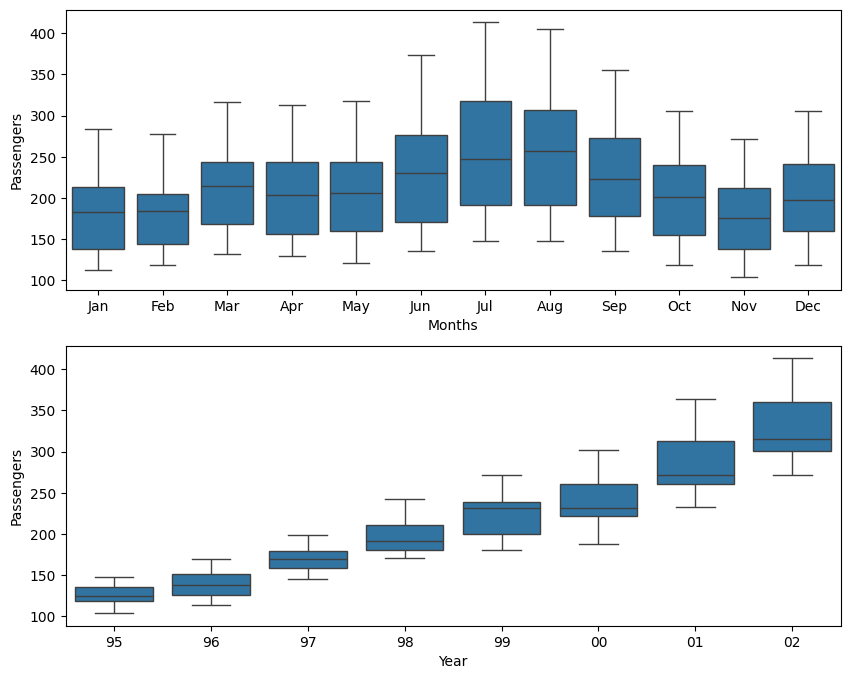

In [29]:
plt.figure(figsize=(10,8))
plt.subplot(211)
sns.boxplot(x="Months", y="Passengers", data=airlines)
plt.subplot(212)
sns.boxplot(x="Year", y="Passengers", data=airlines)

In [30]:
Month_Dummies=pd.DataFrame(pd.get_dummies(airlines['Months']))
airline1=pd.concat([airlines,Month_Dummies],axis=1)

In [31]:
airline1["t"]=np.arange(1,97)
airline1["t_squared"]=airline1["t"]*airline1["t"]
airline1["Log_Passengers"]=np.log(airline1["Passengers"])

In [32]:
airline1

,Month,Passengers,Date,Months,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,Log_Passengers
0,1995-01-01,112,1995-01-01,Jan,95,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,95,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,95,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,95,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,95,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,02,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,2002-09-01,Sep,02,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,2002-10-01,Oct,02,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,2002-11-01,Nov,02,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


<Axes: xlabel='Year', ylabel='Passengers'>

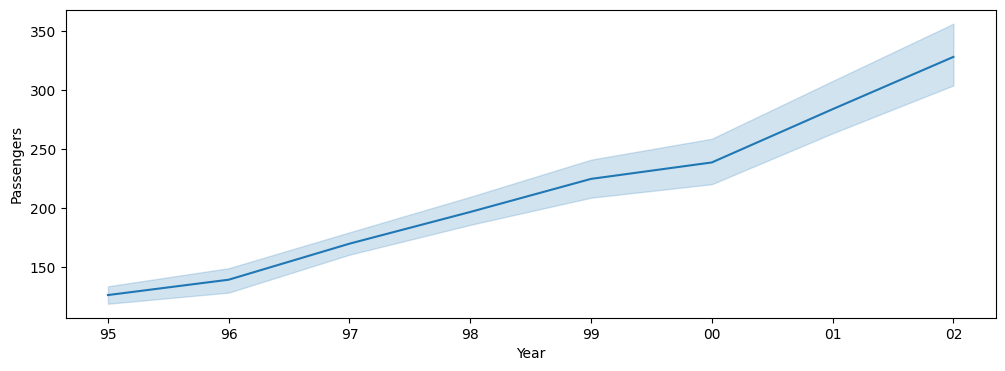

In [33]:
plt.figure(figsize=(12,4))
sns.lineplot(x="Year", y="Passengers", data=airlines)

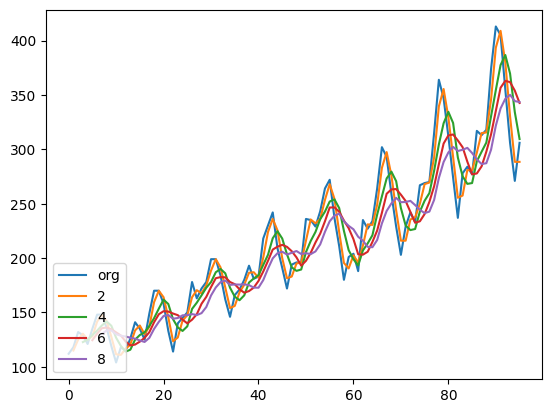

In [34]:
airlines.Passengers.plot(label="org")
for i in range(2,10,2):
    airlines["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

<Axes: >

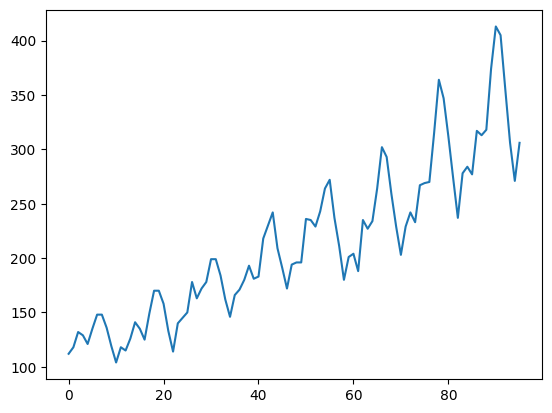

In [35]:
airlines.Passengers.plot()

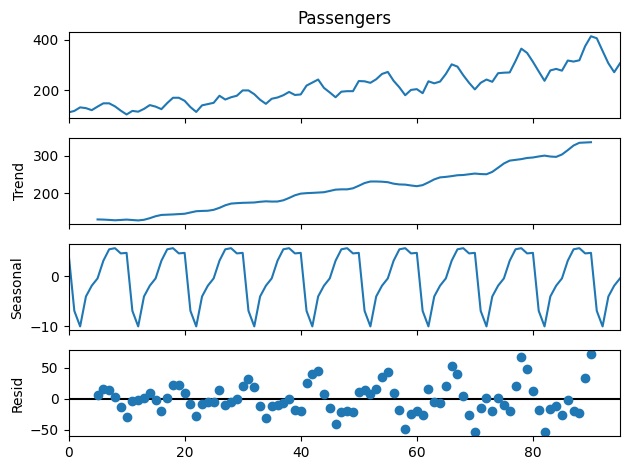

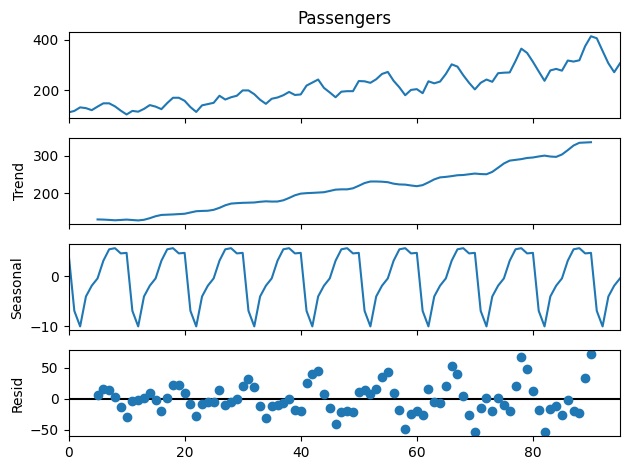

In [36]:
import statsmodels.api as smf

seasonal_ts_add=smf.tsa.seasonal_decompose(airlines["Passengers"],period=10)
seasonal_ts_add.plot()

In [37]:
Train=airline1.head(80)
Test=airline1.tail(16)

**Build Model & RMSE Value**

In [38]:
import statsmodels.formula.api as smf

linear_model=smf.ols('Passengers~t',data=Train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.542624067726805

In [39]:
Exp=smf.ols('Log_Passengers~t',data=Train).fit()
pred_Exp=pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.79373939334308

In [40]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.65440369584204

In [41]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.2664764144331

In [42]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad=pd.Series(add_sea_Quad.predict(Test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.910983570105426

In [43]:
Mul_sea = smf.ols('Log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.32648414621102

In [44]:
Mul_Add_sea = smf.ols('Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

9.46900023030625

In [45]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,47.542624
1,rmse_Exp,43.793739
2,rmse_Quad,43.654404
3,rmse_add_sea,129.266476
4,rmse_add_sea_quad,23.910984
5,rmse_Mult_sea,135.326484
6,rmse_Mult_add_sea,9.469000


**Predict with New Data**

In [46]:
t=np.arange(97,108)
t

array([ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107])

In [47]:
t_squared=np.array(t*t)
t_squared

array([ 9409,  9604,  9801, 10000, 10201, 10404, 10609, 10816, 11025,
       11236, 11449])

In [48]:
Month = pd.DataFrame({'Month':['2003-01-01','2003-02-01','2003-03-01','2003-04-01','2003-05-01','2003-06-01','2003-07-01',
                               '2003-08-01','2003-09-01','2003-10-01','2003-10-01']})

In [49]:
df={'t':t,'t_squared':t_squared}
df=pd.DataFrame(df)

In [50]:
newdata=pd.concat([Month, df], axis=1)
newdata

,Month,t,t_squared
0,2003-01-01,97,9409
1,2003-02-01,98,9604
2,2003-03-01,99,9801
3,2003-04-01,100,10000
4,2003-05-01,101,10201
5,2003-06-01,102,10404
6,2003-07-01,103,10609
7,2003-08-01,104,10816
8,2003-09-01,105,11025
9,2003-10-01,106,11236


**Build the model n entire dataset**

In [51]:
model_full = smf.ols('Passengers~t',data=airline1).fit()
pred_new  = pd.Series(model_full.predict(newdata))
pred_new

0     326.941886
1     329.276598
2     331.611311
3     333.946023
4     336.280736
5     338.615448
6     340.950161
7     343.284873
8     345.619585
9     347.954298
10    350.289010
dtype: float64

In [52]:
newdata["forecasted_passengers"]=pd.Series(pred_new)
newdata

,Month,t,t_squared,forecasted_passengers
0,2003-01-01,97,9409,326.941886
1,2003-02-01,98,9604,329.276598
2,2003-03-01,99,9801,331.611311
3,2003-04-01,100,10000,333.946023
4,2003-05-01,101,10201,336.280736
5,2003-06-01,102,10404,338.615448
6,2003-07-01,103,10609,340.950161
7,2003-08-01,104,10816,343.284873
8,2003-09-01,105,11025,345.619585
9,2003-10-01,106,11236,347.954298


**Observation:**
Multiplicative additive seasonality gives the best prediction of leats RMSE of 9.42

**CocaCola Sales Dataset**

In [53]:
from google.colab import files
uploaded=files.upload()

Saving CocaCola_Sales_Rawdata.xlsx to CocaCola_Sales_Rawdata.xlsx


In [54]:
series=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
series

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [55]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [56]:
series.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [57]:
series.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [58]:
series['Quarters']=0
series['Year']=0
for i in range(42):
    p=series["Quarter"][i]
    series["Quarters"][i]=p[0:2]
    series["Year"][i]=p[3:5]

<ipython-input-58-51b5911ea84b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series["Quarters"][i]=p[0:2]
<ipython-input-58-51b5911ea84b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series["Year"][i]=p[3:5]


In [59]:
series

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87
5,Q2_87,2104.411995,Q2,87
6,Q3_87,2014.362999,Q3,87
7,Q4_87,1991.746998,Q4,87
8,Q1_88,1869.049999,Q1,88
9,Q2_88,2313.631996,Q2,88


In [60]:
quarters_dummies=pd.DataFrame(pd.get_dummies(series['Quarters']))
series=pd.concat([series,quarters_dummies],axis=1)
series.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [62]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quarter   42 non-null     object 
 1   Sales     42 non-null     float64
 2   Quarters  42 non-null     object 
 3   Year      42 non-null     object 
 4   Q1        42 non-null     uint8  
 5   Q2        42 non-null     uint8  
 6   Q3        42 non-null     uint8  
 7   Q4        42 non-null     uint8  
dtypes: float64(1), object(3), uint8(4)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quarter   42 non-null     object 
 1   Sales     42 non-null     float64
 2   Quarters  42 non-null     object 
 3   Year      42 non-null     object 
 4   Q1        42 non-null     uint8  
 5   Q2        42 non-null     uint8  
 6   Q3        42 non-null     u

<Axes: xlabel='Quarters', ylabel='Year'>

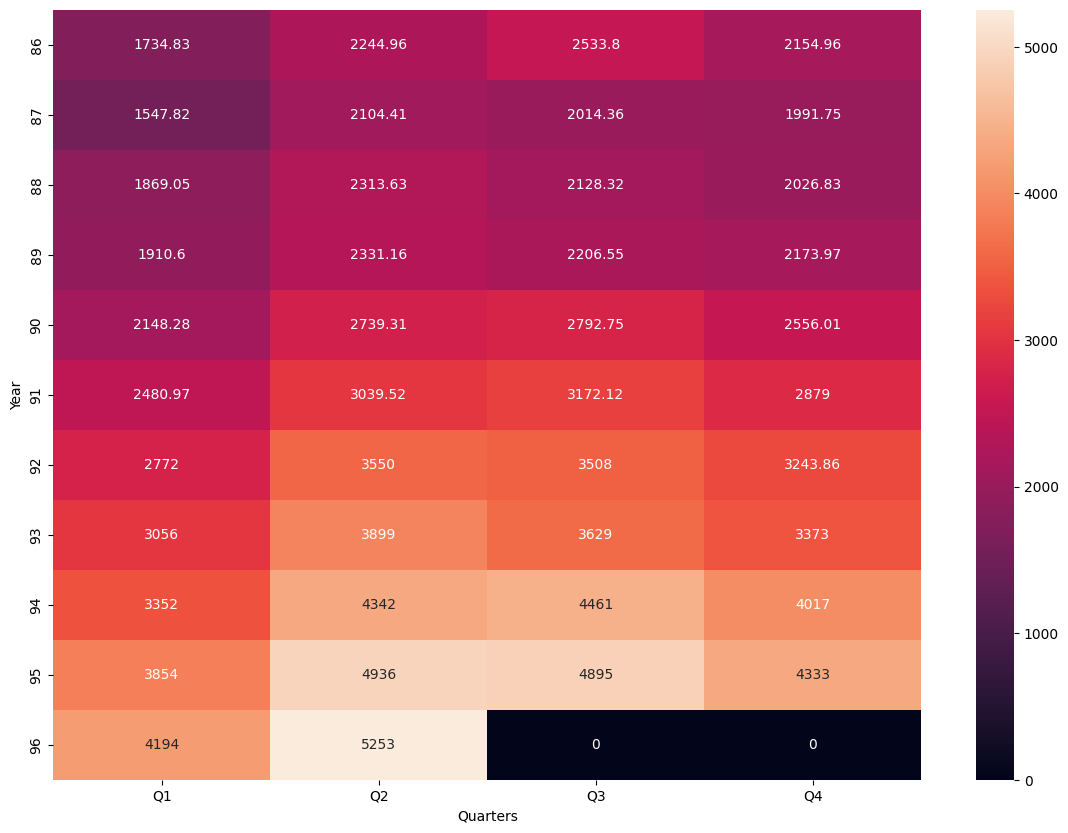

In [64]:
plt.figure(figsize=(14,10))
heatmap_y_year=pd.pivot_table(data=series,values="Sales",index="Year",columns="Quarters",fill_value=0)
sns.heatmap(heatmap_y_year,annot=True,fmt="g")

<Axes: >

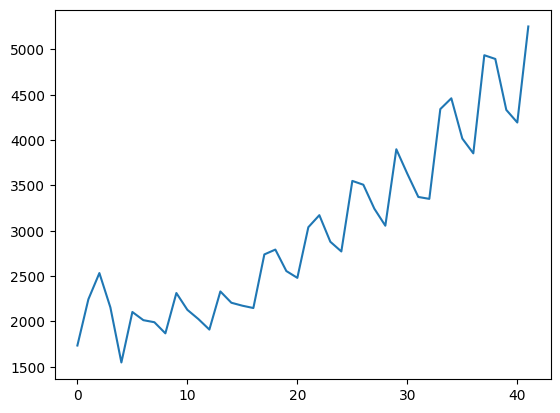

In [65]:
series.Sales.plot()

<Axes: >

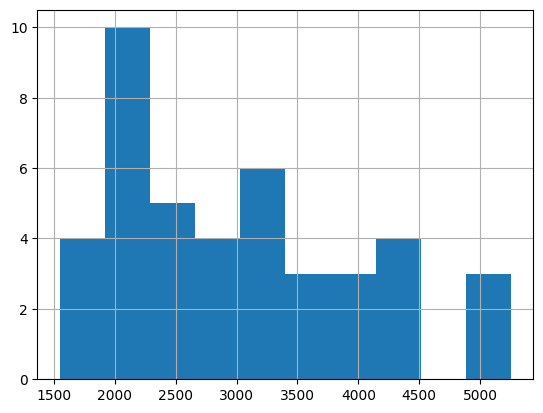

In [66]:
series.Sales.hist()

<Axes: ylabel='Density'>

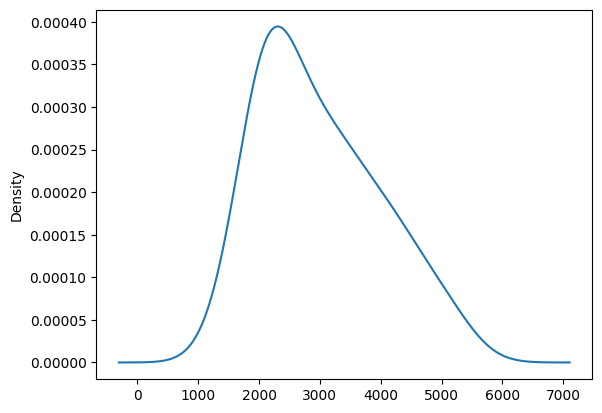

In [67]:
series.Sales.plot(kind="kde")

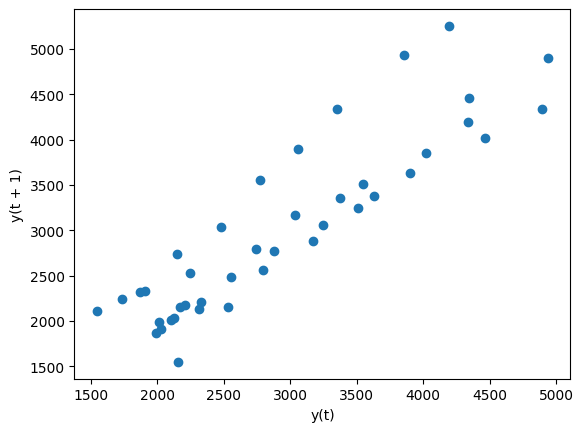

In [68]:
lag_plot(series.Sales)
plt.show()

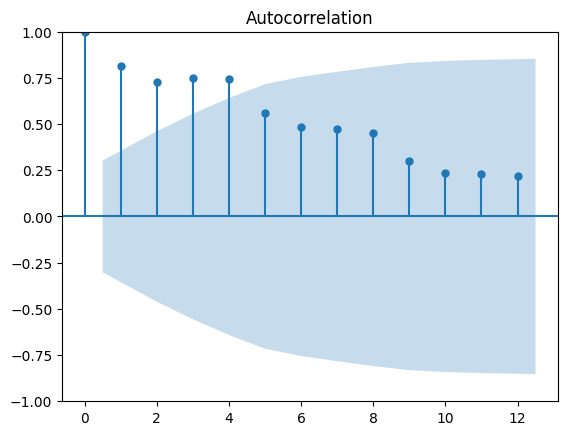

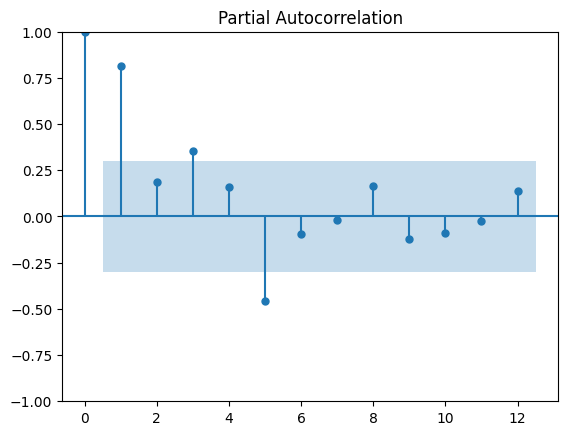

In [70]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(series.Sales,lags=12)
tsa_plots.plot_pacf(series.Sales,lags=12)
plt.show()

<Axes: xlabel='Year', ylabel='Sales'>

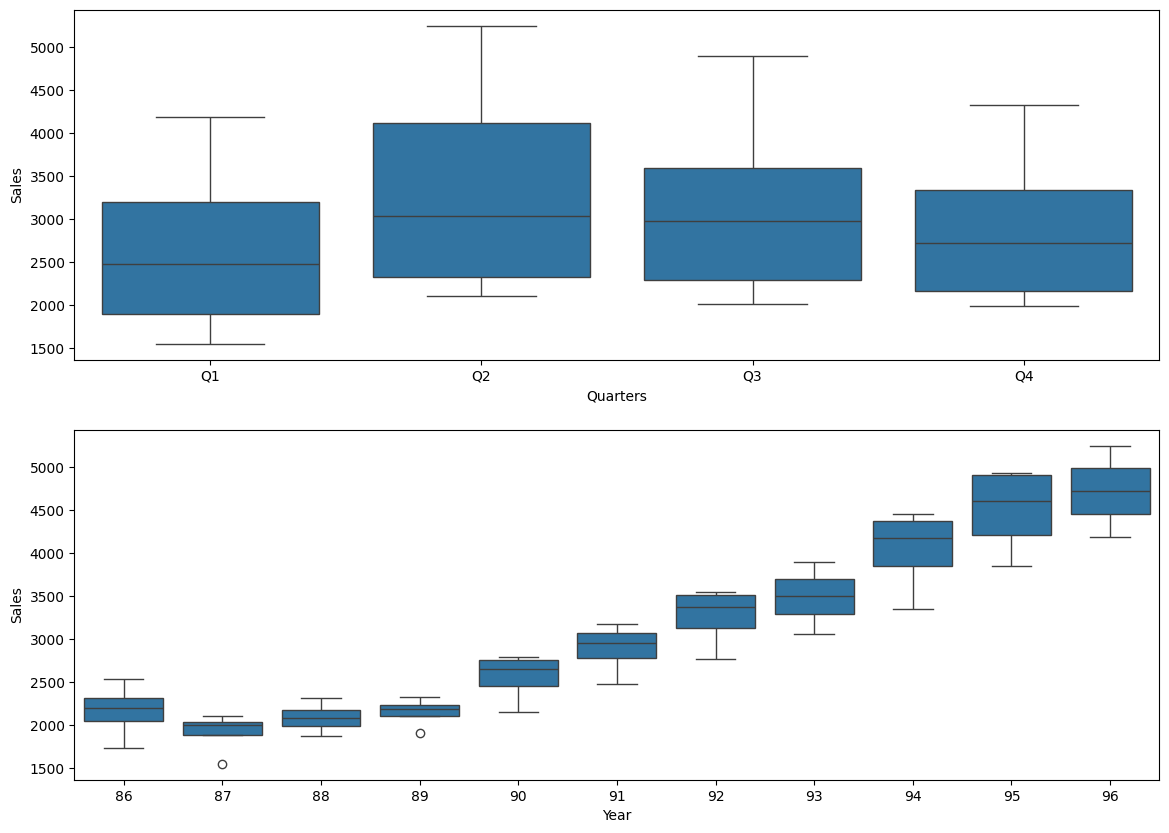

In [72]:
plt.figure(figsize=(14,10))
plt.subplot(211)
sns.boxplot(x="Quarters",y="Sales",data=series)
plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=series)

In [73]:
series["t"] = np.arange(1,43)
series["t_squared"] = series["t"]*series["t"]
series["log_sales"] = np.log(series["Sales"])
series.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


<Axes: xlabel='Year', ylabel='Sales'>

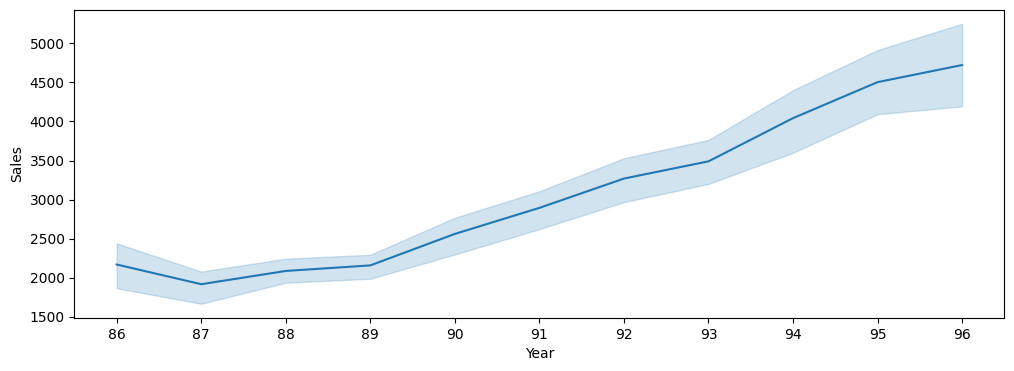

In [74]:
plt.figure(figsize=(12,4))
sns.lineplot(x="Year",y="Sales",data=series)

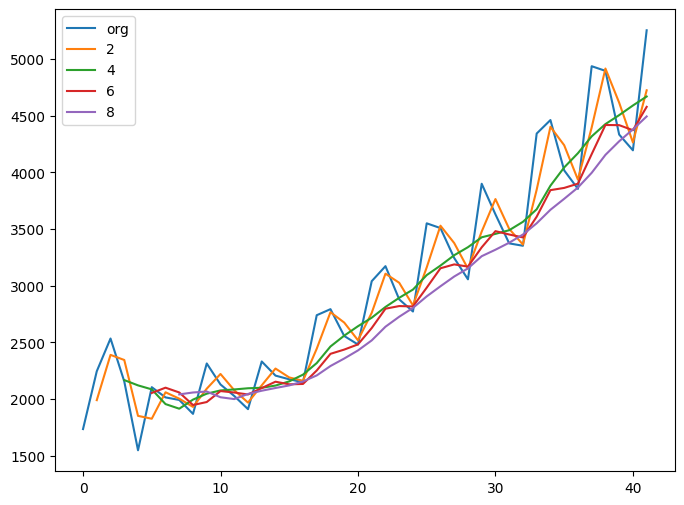

In [75]:
plt.figure(figsize=(8,6))
series.Sales.plot(label="org")
for i in range(2,10,2):
    series["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

<Axes: >

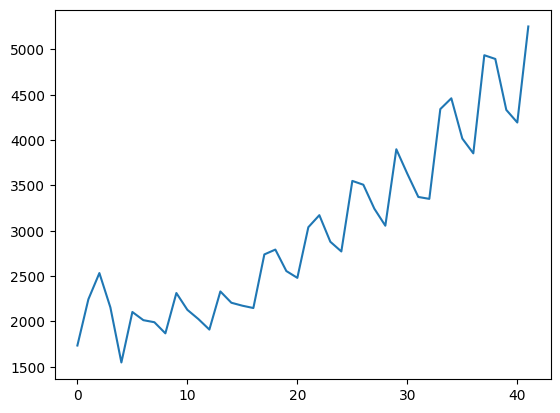

In [76]:
series.Sales.plot()

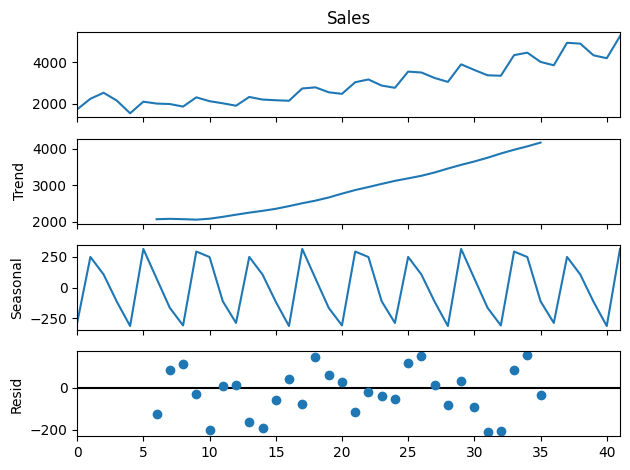

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(series.Sales,period=12)
decompose_ts_add.plot()
plt.show()

In [79]:
train=series.head(32)
test=series.tail(10)

In [80]:
import statsmodels.formula.api as smf

linear_model=smf.ols('Sales~t', data=train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

752.9233932767116

In [81]:
Exp = smf.ols('log_sales~t', data=train).fit()
pred_exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

590.3316432076487

In [82]:
Quad = smf.ols('Sales~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

457.735735540752

In [83]:
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1850.466546185836

In [84]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

277.3510771128639

In [86]:
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1908.2503948361164

In [87]:
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

448.86781826918514

In [88]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,277.351077
6,rmse_Mult_add_sea,448.867818
2,rmse_quad,457.735736
1,rmse_exp,590.331643
0,rmse_linear,752.923393
3,rmse_add_sea,1850.466546
5,rmse_Mult_sea,1908.250395


In [89]:
data = [['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'],['Q2_97', 'Q2']]
print(data)
forecast = pd.DataFrame(data, columns = ['Quarter', 'quarter'])
forecast

[['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'], ['Q2_97', 'Q2']]


,Quarter,quarter
0,Q3_96,Q3
1,Q4_96,Q4
2,Q1_97,Q1
3,Q2_97,Q2


Create dummies and T and T-Squared columns

In [90]:
dummies = pd.DataFrame(pd.get_dummies(forecast['quarter']))
forecast1 = pd.concat([forecast,dummies],axis = 1)

forecast1["t"] = np.arange(1,5)
forecast1["t_squared"] = forecast1["t"]*forecast1["t"]
print("\nAfter Dummy, T and T-Square\n\n",forecast1.head())


After Dummy, T and T-Square

   Quarter quarter  Q1  Q2  Q3  Q4  t  t_squared
0   Q3_96      Q3   0   0   1   0  1          1
1   Q4_96      Q4   0   0   0   1  2          4
2   Q1_97      Q1   1   0   0   0  3          9
3   Q2_97      Q2   0   1   0   0  4         16


**Forecasting using additives Seasonality Quadratic Model**

In [91]:
model_full = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=series).fit()
pred_new  = pd.Series(model_full.predict(forecast1))
pred_new

forecast1["forecasted_sales"] = pd.Series(pred_new)

**Final Prediction for next 4 Quarters**

In [92]:
Final_predict = forecast1.loc[:, ['Quarter', 'forecasted_sales']]
Final_predict

,Quarter,forecasted_sales
0,Q3_96,2180.858824
1,Q4_96,1851.383709
2,Q1_97,1635.419724
3,Q2_97,2284.261547
